**TABLE OF CONTENT**

PART I:

1. IMPORTING FILES AND LIBRARIES
2. TRAIN AND TEST SPLIT
3. LOGISSTIC REGRESSION
4. XG BOOST
5. RANDOM FOREST
6. KNN
7. SVM
8. DECISION TREE
9. COMPARISION
10. RESULTS


PART II: DATA RESAMPLING

1. OVERSAMPLING (SMOTE)
2. UNDER SAMPLING (RANDOM)
3. LOGISTIC REGRESSION
4. SVM


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv("/content/drive/MyDrive/A1-fyp2- churn/encoded_scaled_data.csv")
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,CLV,AvgMonthlyCharges
4950,1,0,1,0,0.055556,1,1,0,1,0,...,0,1,0,0,0,0,1,0,0.042877,0.720790
2714,1,0,0,0,0.750000,1,1,0,0,1,...,0,0,0,1,1,0,0,0,0.600632,0.743494
4347,1,0,0,0,0.694444,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0.585965,0.808307
5821,1,0,1,0,0.958333,1,1,0,0,0,...,1,0,1,0,0,0,1,0,0.212246,0.109488
1613,0,0,0,0,0.472222,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0.078339,0.056637


In [4]:
df.shape


(7043, 29)

**Train test split**

In [5]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

In [6]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
X_train.shape

(5634, 28)

In [8]:
X_test.shape

(1409, 28)

**LOGISTIC REGRESSION**

Logistic Regression Accuracy: 82.26%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409


Confusion Matrix:
[[937  99]
 [151 222]]

Logistic Regression AUC: 0.86


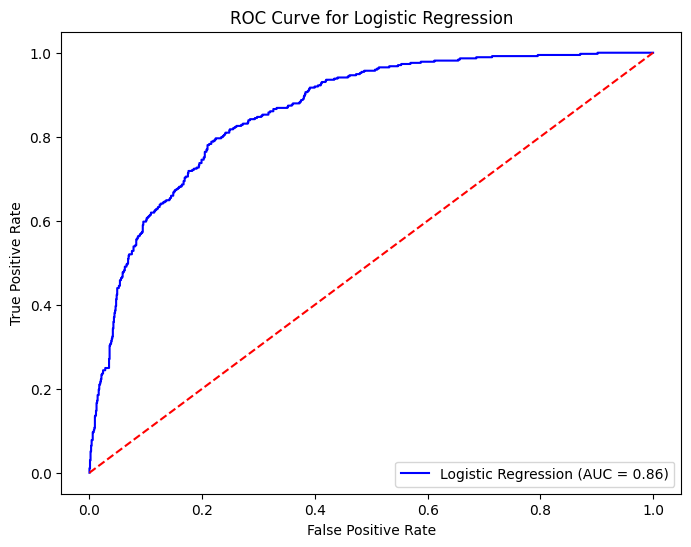

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_lg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_lg * 100:.2f}%")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# ROC and AUC Evaluation
# Predict probabilities instead of class labels
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_log_reg)

# Calculate AUC (Area Under the Curve)
auc_score_lg = roc_auc_score(y_test, y_pred_prob_log_reg)
print(f"\nLogistic Regression AUC: {auc_score_lg:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score_lg:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()

**XG BOOST**

In [ ]:
# First, install XGBoost if you haven't already
# !pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)

In [ ]:

# Train the XGBoost model on the data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:



# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)


In [ ]:

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 79.06%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.63      0.50      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Confusion Matrix:
[[926 110]
 [185 188]]



xgb AUC: 0.84


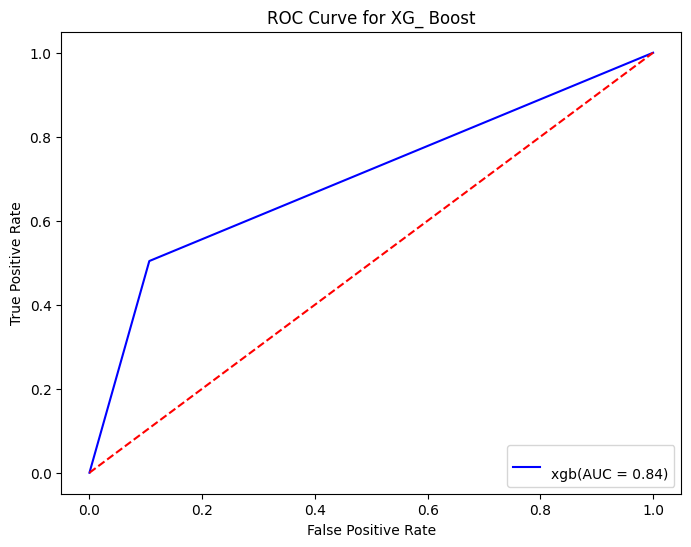

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
# ROC and AUC Evaluation
# Predict probabilities instead of class labels
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

# Calculate AUC (Area Under the Curve)
auc_score_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
print(f"\nxgb AUC: {auc_score_xgb:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"\nxgb(AUC = {auc_score_xgb:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XG_ Boost")
plt.legend(loc="lower right")
plt.show()

**RANDOM FOREST**

In [15]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest with 100 trees (adjustable)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [16]:
# Train the model on the training set
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

**Evaluation**

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import necessary functions from sklearn.metrics# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 78.71%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.63      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409


Confusion Matrix:
[[936 100]
 [200 173]]



Random faorest AUC: 0.84


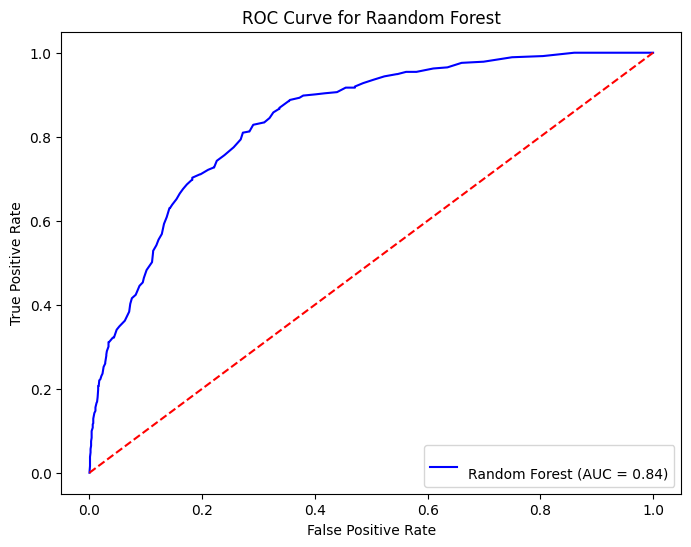

In [19]:
# ROC and AUC Evaluation
# Predict probabilities instead of class labels
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

# Calculate AUC (Area Under the Curve)
auc_score_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f"\nRandom faorest AUC: {auc_score_rf:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"\nRandom Forest (AUC = {auc_score_rf:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Raandom Forest")
plt.legend(loc="lower right")
plt.show()

**KNN**

In [20]:
#importing library
from sklearn.neighbors import KNeighborsClassifier


In [21]:
#Initialize the KNN Model
#We’ll start by initializing the KNN model and choosing a value for k. A common practice is to start with k=5, but we can fine-tune this later.
knn = KNeighborsClassifier(n_neighbors=16)

In [22]:
# Train the KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [23]:
# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

**EVALUATION**

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
# Evaluate model performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

Accuracy: 78.99%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.63      0.50      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Confusion Matrix:
[[925 111]
 [185 188]]



KNN AUC: 0.83


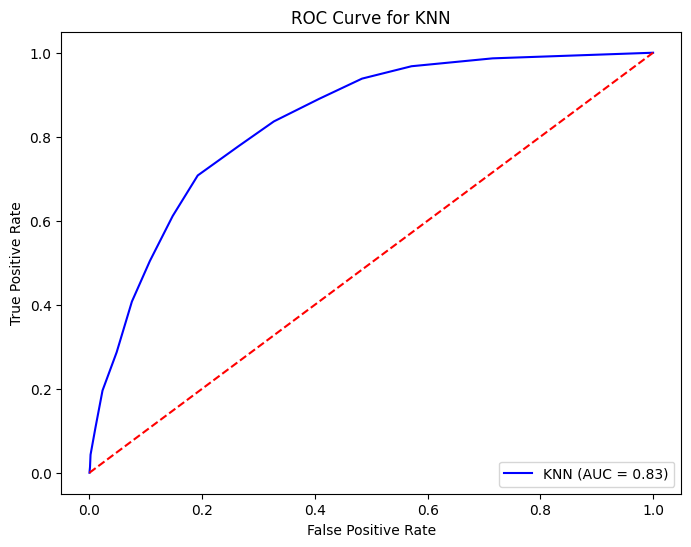

In [26]:
# ROC and AUC Evaluation
# Predict probabilities instead of class labels
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)

# Calculate AUC (Area Under the Curve)
auc_score_knn = roc_auc_score(y_test, y_pred_prob_knn)
print(f"\nKNN AUC: {auc_score_knn:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"KNN (AUC = {auc_score_knn:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN")
plt.legend(loc="lower right")
plt.show()

In [27]:
# Fine-tune the value of k
for k in range(16, 90):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    print(f"k={k}, Accuracy: {accuracy * 100:.2f}%")

k=16, Accuracy: 78.99%
k=17, Accuracy: 79.42%
k=18, Accuracy: 79.70%
k=19, Accuracy: 79.63%
k=20, Accuracy: 79.99%
k=21, Accuracy: 80.13%
k=22, Accuracy: 80.48%
k=23, Accuracy: 80.34%
k=24, Accuracy: 80.55%
k=25, Accuracy: 80.13%
k=26, Accuracy: 80.55%
k=27, Accuracy: 80.41%
k=28, Accuracy: 80.84%
k=29, Accuracy: 80.27%
k=30, Accuracy: 80.62%
k=31, Accuracy: 80.55%
k=32, Accuracy: 80.98%
k=33, Accuracy: 80.41%
k=34, Accuracy: 80.91%
k=35, Accuracy: 80.55%
k=36, Accuracy: 80.98%
k=37, Accuracy: 80.41%
k=38, Accuracy: 80.48%
k=39, Accuracy: 80.62%
k=40, Accuracy: 80.13%
k=41, Accuracy: 80.91%
k=42, Accuracy: 80.91%
k=43, Accuracy: 80.77%
k=44, Accuracy: 81.05%
k=45, Accuracy: 81.12%
k=46, Accuracy: 81.05%
k=47, Accuracy: 81.12%
k=48, Accuracy: 80.98%
k=49, Accuracy: 80.91%
k=50, Accuracy: 81.19%
k=51, Accuracy: 81.19%
k=52, Accuracy: 81.12%
k=53, Accuracy: 81.19%
k=54, Accuracy: 81.19%
k=55, Accuracy: 81.19%
k=56, Accuracy: 81.48%
k=57, Accuracy: 81.33%
k=58, Accuracy: 81.62%
k=59, Accur

**SVM**

SVM Accuracy: 81.90%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409


Confusion Matrix:
[[934 102]
 [153 220]]

SVM AUC: 0.85


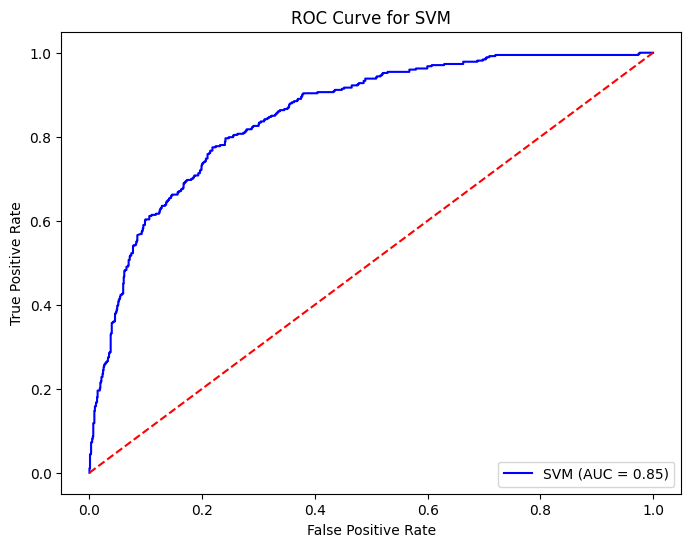

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Initialize Support Vector Machine model with probability enabled
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# ROC and AUC Evaluation
# Predict probabilities instead of class labels
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_svm)

# Calculate AUC (Area Under the Curve)
auc_score_svm = roc_auc_score(y_test, y_pred_prob_svm)
print(f"\nSVM AUC: {auc_score_svm:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"SVM (AUC = {auc_score_svm:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.legend(loc="lower right")
plt.show()


**Desision tree**

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
# Initialize the Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)  # random_state ensures reproducibility

In [31]:
# Train the model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
# Make predictions on the test set
y_pred_dtree = dtree.predict(X_test)

**EVALUATION**

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
# Calculate accuracy
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"Decision Tree Accuracy: {accuracy_dtree * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dtree))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtree))

Decision Tree Accuracy: 73.17%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1036
           1       0.49      0.48      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409


Confusion Matrix:
[[851 185]
 [193 180]]



DESISION TREE AUC: 0.65


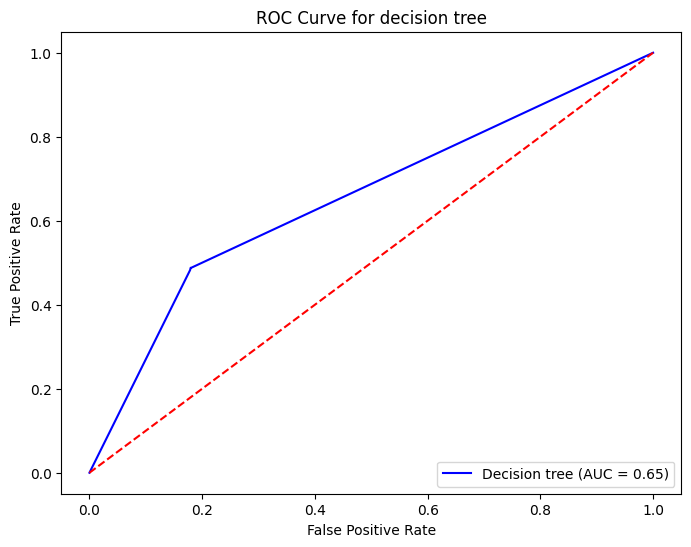

In [35]:
# ROC and AUC Evaluation
# Predict probabilities instead of class labels
y_pred_prob_tree = dtree.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_tree)

# Calculate AUC (Area Under the Curve)
auc_score_tree = roc_auc_score(y_test, y_pred_prob_tree)
print(f"\nDESISION TREE AUC: {auc_score_tree:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision tree (AUC = {auc_score_tree:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for decision tree")
plt.legend(loc="lower right")
plt.show()

**COMPARISION GRAPHS**

In [36]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from itertools import cycle

In [37]:
def plot_roc_curves(models, X, y):
    plt.figure(figsize=(10, 8))
    colors = cycle(['blue', 'red', 'green','black','yellow','cyan'])

    for (name, model), color in zip(models.items(), colors):
        y_pred_proba = model.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, color=color, lw=2,
                 label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [38]:
def plot_precision_recall_curves(models, X, y):
    plt.figure(figsize=(10, 8))
    colors = cycle(['blue', 'red', 'green','black', 'yellow', 'cyan'])

    for (name, model), color in zip(models.items(), colors):
        y_pred_proba = model.predict_proba(X)[:, 1]
        precision, recall, _ = precision_recall_curve(y, y_pred_proba)
        average_precision = average_precision_score(y, y_pred_proba)

        plt.plot(recall, precision, color=color, lw=2,
                 label=f'{name} (AP = {average_precision:.2f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

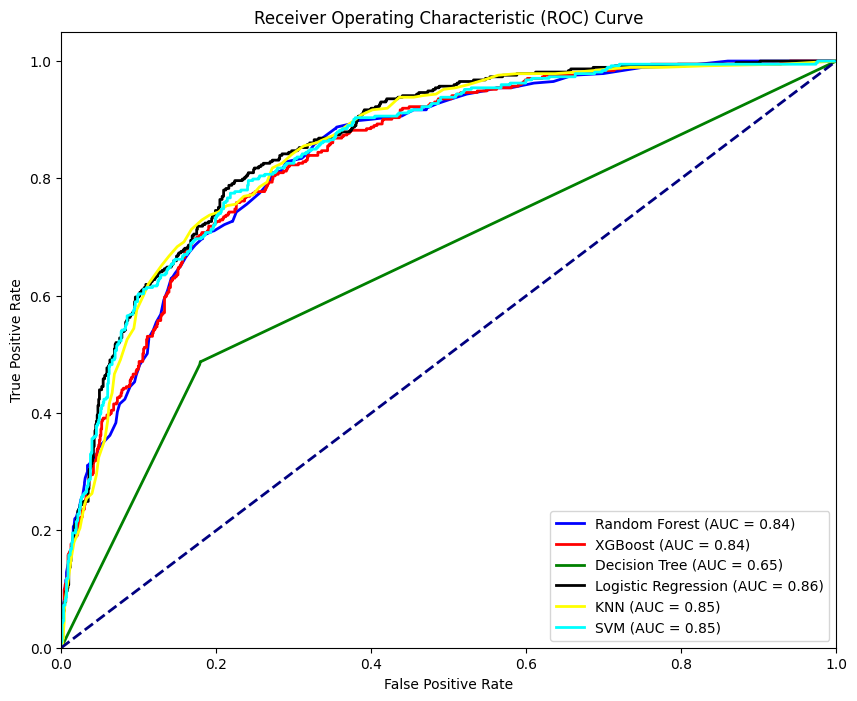

In [39]:
# Assuming your models are stored in variables like rf_model, xgb_model, dtree_model, etc.
models = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Decision Tree': dtree,
    'Logistic Regression': log_reg,
    'KNN': knn,
    'SVM': svm_model
}

# Now, call your plotting functions with the models dictionary
plot_roc_curves(models, X_test, y_test)


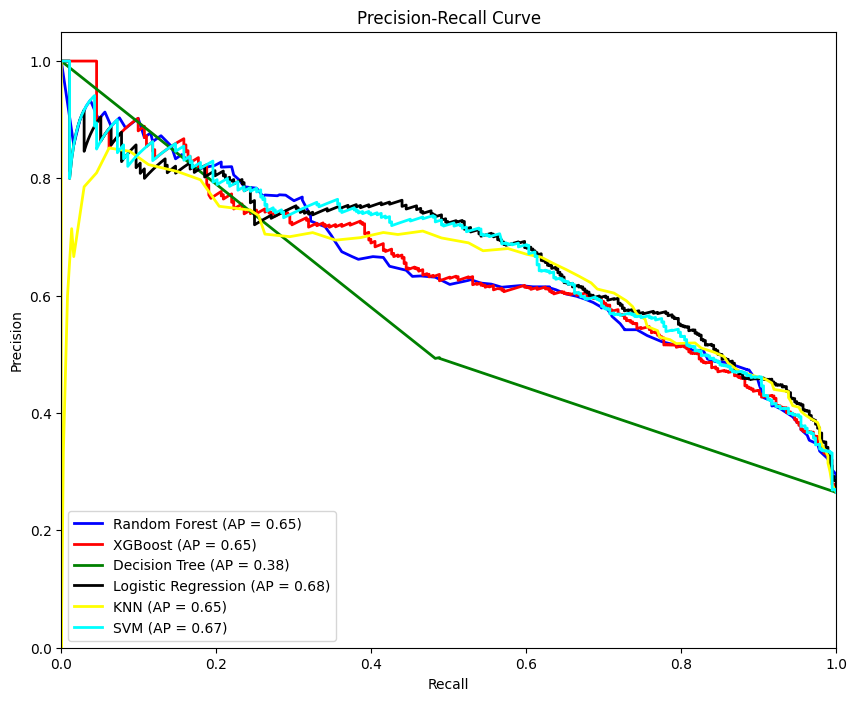

In [40]:
plot_precision_recall_curves(models, X_test, y_test)

**RESULTS AND CONCLUSIONS**

In [41]:
results = {
    'Random Forest': accuracy_rf,
    'XGBoost': accuracy_xgb,
    'Decision Tree': accuracy_dtree,
    'Logistic Regression': accuracy_lg,
    'KNN': accuracy_knn,
    'SVM': accuracy_svm
}

# Find the model with the best accuracy
best_model = max(results, key=results.get)

print(f"\nBest Model: {best_model}")
print(f"Best Accuracy: {results[best_model]:.4f}")



Best Model: Logistic Regression
Best Accuracy: 0.8226


In [42]:


# Define a dictionary to store AUC scores for each model
results_roc = {
    'Random Forest': auc_score_rf,
    'XGBoost': auc_score_xgb,
    'Decision Tree': auc_score_tree,
    'Logistic Regression': auc_score_lg,
    'KNN': auc_score_knn,
    'SVM': auc_score_svm
}

# Find the best model based on AUC
best_model_roc = max(results_roc, key=results_roc.get)

# Print the best model and its AUC score
print(f"\nBest Model: {best_model_roc}")
print(f"Best ROC AUC: {results_roc[best_model_roc]:.4f}")



Best Model: Logistic Regression
Best ROC AUC: 0.8615


**Results and Insights**
After evaluating all models, we found that the Logistic Regression model performed the best with an accuracy of **82.26%** ROC AUC score of **8.8615.**

Key findings:
Contract type is a strong predictor of churn. Customers on month-to-month contracts are more likely to churn.
Customers with higher monthly charges and lower tenure are more prone to churning.
The presence of certain services (like online security and tech support) correlates with lower churn rates.

**RESAMPLING**

**OVER SAMPLING**

In [48]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Initialize SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)

# Apply SMOTE on the training set
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"Resampled training set shape: {X_train_res.shape}")
print(f"Resampled class distribution: {np.bincount(y_train_res)}")



Resampled training set shape: (8276, 28)
Resampled class distribution: [4138 4138]


**UNDERSAMPLING**

In [49]:
# Initialize RandomUnderSampler for undersampling the majority class
rus = RandomUnderSampler(random_state=42)

# Apply RandomUnderSampler on the training set
X_train_undersample, y_train_undersample = rus.fit_resample(X_train, y_train)

print(f"Undersampled training set shape: {X_train_undersample.shape}")
print(f"Undersampled class distribution: {np.bincount(y_train_undersample)}")


Undersampled training set shape: (2992, 28)
Undersampled class distribution: [1496 1496]


In [44]:
# Train the Logistic Regression model on the undersampled data
log_reg_resampled = LogisticRegression(random_state=42, max_iter=1000)
log_reg_resampled.fit(X_train_undersample, y_train_undersample)

# Make predictions on the test set
y_pred_log_res = log_reg_resampled.predict(X_test)

# Evaluate the model
accuracy_log_res = accuracy_score(y_test, y_pred_log_res)
print(f"Logistic Regression (Undersampling) Accuracy: {accuracy_log_res * 100:.2f}%")

# ROC and AUC for Undersampling
y_pred_prob_log_res = log_reg_resampled.predict_proba(X_test)[:, 1]
auc_score_log_res = roc_auc_score(y_test, y_pred_prob_log_res)
print(f"Logistic Regression (Undersampling) AUC: {auc_score_log_res:.2f}")


Logistic Regression (Undersampling) Accuracy: 75.66%
Logistic Regression (Undersampling) AUC: 0.86


Class distribution after SMOTE:
Churn
0    4138
1    4138
Name: count, dtype: int64
Logistic Regression with SMOTE Accuracy: 77.57%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1036
           1       0.56      0.77      0.64       373

    accuracy                           0.78      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.78      0.79      1409


Confusion Matrix:
[[806 230]
 [ 86 287]]

Logistic Regression with SMOTE AUC: 0.85


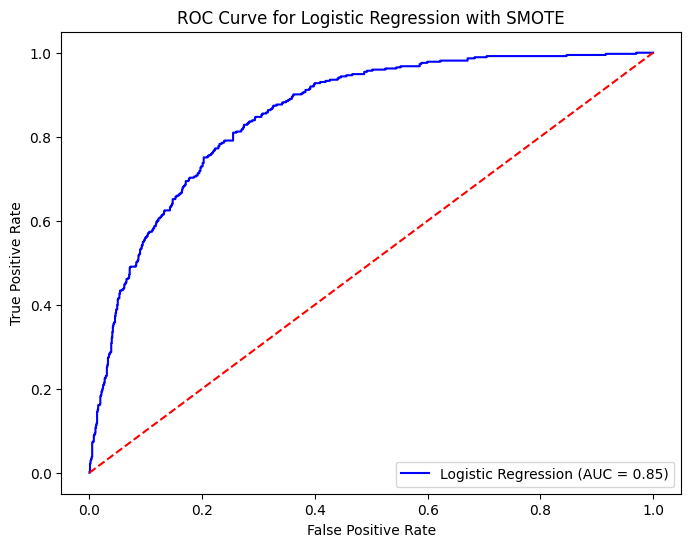

In [45]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

# Initialize Logistic Regression model
log_reg_smote = LogisticRegression(random_state=42, max_iter=1000)

# Train the model with SMOTE data
log_reg_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_log_reg_smote = log_reg_smote.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_smote = accuracy_score(y_test, y_pred_log_reg_smote)
print(f"Logistic Regression with SMOTE Accuracy: {accuracy_smote * 100:.2f}%")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg_smote))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg_smote))

# ROC and AUC Evaluation
# Predict probabilities instead of class labels
y_pred_prob_log_reg_smote = log_reg_smote.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC curve
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_pred_prob_log_reg_smote)

# Calculate AUC (Area Under the Curve)
auc_score_smote = roc_auc_score(y_test, y_pred_prob_log_reg_smote)
print(f"\nLogistic Regression with SMOTE AUC: {auc_score_smote:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, label=f"Logistic Regression (AUC = {auc_score_smote:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression with SMOTE")
plt.legend(loc="lower right")
plt.show()


Undersampled training set shape (SVM): (2992, 28)
Undersampled class distribution (SVM): [1496 1496]
SVM (Undersampling) Accuracy: 70.62%
SVM (Undersampling) AUC: 0.85


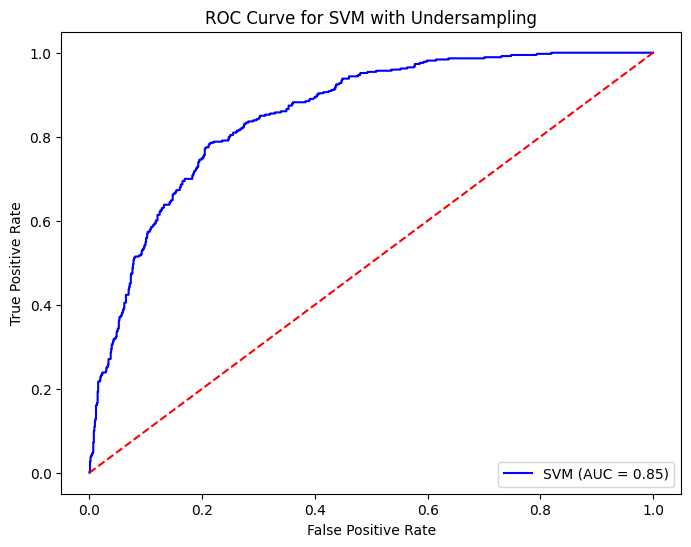

In [46]:
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Initialize RandomUnderSampler for undersampling the majority class
rus_svm = RandomUnderSampler(random_state=42)

# Apply RandomUnderSampler on the training set
X_train_undersample_svm, y_train_undersample_svm = rus_svm.fit_resample(X_train, y_train)

print(f"Undersampled training set shape (SVM): {X_train_undersample_svm.shape}")
print(f"Undersampled class distribution (SVM): {np.bincount(y_train_undersample_svm)}")

# Train the SVM model on the undersampled data
svm_undersample = SVC(kernel='linear', probability=True, random_state=42)
svm_undersample.fit(X_train_undersample_svm, y_train_undersample_svm)

# Make predictions on the test set
y_pred_svm_undersample = svm_undersample.predict(X_test)

# Evaluate the model
accuracy_svm_undersample = accuracy_score(y_test, y_pred_svm_undersample)
print(f"SVM (Undersampling) Accuracy: {accuracy_svm_undersample * 100:.2f}%")

# ROC and AUC for Undersampling
y_pred_prob_svm_undersample = svm_undersample.predict_proba(X_test)[:, 1]
auc_score_svm_undersample = roc_auc_score(y_test, y_pred_prob_svm_undersample)
print(f"SVM (Undersampling) AUC: {auc_score_svm_undersample:.2f}")

# Plot ROC curve for SVM with undersampling
fpr_svm_undersample, tpr_svm_undersample, _ = roc_curve(y_test, y_pred_prob_svm_undersample)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_undersample, tpr_svm_undersample, label=f"SVM (AUC = {auc_score_svm_undersample:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM with Undersampling")
plt.legend(loc="lower right")
plt.show()


Class distribution after SMOTE (SVM): [4138 4138]
SVM with SMOTE Accuracy: 76.37%

Classification Report (SVM with SMOTE):
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1036
           1       0.54      0.75      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409


Confusion Matrix (SVM with SMOTE):
[[796 240]
 [ 93 280]]

SVM with SMOTE AUC: 0.85


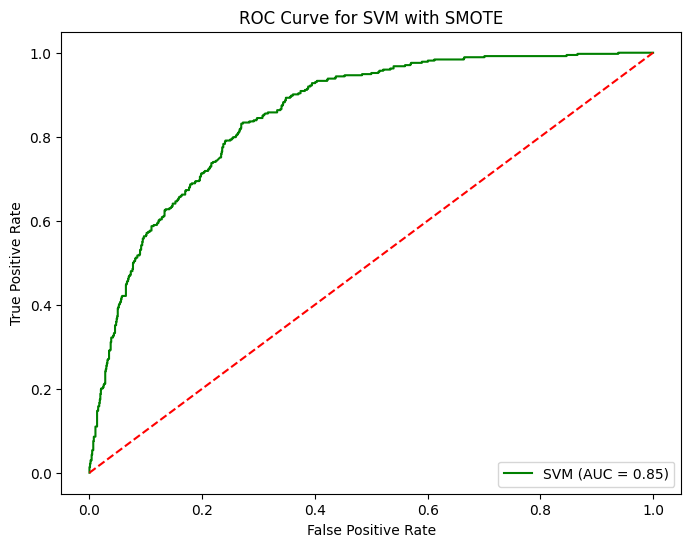

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

# Initialize SMOTE for oversampling the minority class
smote_svm = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote_svm, y_train_smote_svm = smote_svm.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE
print(f"Class distribution after SMOTE (SVM): {np.bincount(y_train_smote_svm)}")

# Train the SVM model on the SMOTE data
svm_smote = SVC(kernel='linear', probability=True, random_state=42)
svm_smote.fit(X_train_smote_svm, y_train_smote_svm)

# Make predictions on the test set
y_pred_svm_smote = svm_smote.predict(X_test)

# Evaluate the SVM model
accuracy_svm_smote = accuracy_score(y_test, y_pred_svm_smote)
print(f"SVM with SMOTE Accuracy: {accuracy_svm_smote * 100:.2f}%")

# Print classification report and confusion matrix
print("\nClassification Report (SVM with SMOTE):")
print(classification_report(y_test, y_pred_svm_smote))

print("\nConfusion Matrix (SVM with SMOTE):")
print(confusion_matrix(y_test, y_pred_svm_smote))

# ROC and AUC Evaluation
y_pred_prob_svm_smote = svm_smote.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC curve
fpr_svm_smote, tpr_svm_smote, _ = roc_curve(y_test, y_pred_prob_svm_smote)

# Calculate AUC (Area Under the Curve)
auc_score_svm_smote = roc_auc_score(y_test, y_pred_prob_svm_smote)
print(f"\nSVM with SMOTE AUC: {auc_score_svm_smote:.2f}")

# Plot ROC curve for SVM with SMOTE
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_smote, tpr_svm_smote, label=f"SVM (AUC = {auc_score_svm_smote:.2f})", color='green')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM with SMOTE")
plt.legend(loc="lower right")
plt.show()
